In [194]:
import pandas as pd
from datetime import datetime, date, time
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
%matplotlib inline

In [195]:
DATASET = 'opendata.csv'

In [196]:
df = pd.read_csv(DATASET, encoding='windows-1251')
df.head(5)

,name,region,date,value
0,Количество заявок на потребительские кредиты,Россия,2013-01-15,571147
1,Количество заявок на потребительские кредиты,Россия,2013-02-15,504508
2,Количество заявок на потребительские кредиты,Россия,2013-03-15,628803
3,Количество заявок на потребительские кредиты,Россия,2013-04-15,836054
4,Количество заявок на потребительские кредиты,Россия,2013-05-15,867235


In [197]:
df.dtypes

name      object
region    object
date      object
value      int64
dtype: object

In [198]:
df['date'] = pd.to_datetime(df['date'])

In [199]:
df.dtypes

name              object
region            object
date      datetime64[ns]
value              int64
dtype: object

In [200]:
df['name'].unique()

array(['Количество заявок на потребительские кредиты',
       'Средняя сумма заявки на потребительский кредит',
       'Количество заявок на ипотечные кредиты',
       'Средняя сумма заявки на ипотечный кредит',
       'Количество новых депозитов', 'Средняя сумма нового депозита',
       'Средняя зарплата', 'Средняя пенсия',
       'В среднем руб. на текущем счете на человека',
       'В среднем депозитов в руб. на человека',
       'Средние расходы по картам', 'Средний чек в формате Фастфуд',
       'Средний чек в формате Ресторан',
       'Средние траты в ресторане фастфуд', 'Средние траты в ресторане'],
      dtype=object)

In [201]:
df['region'].unique()

array(['Россия', 'Алтайский край', 'Амурская область',
       'Архангельская область', 'Астраханская область',
       'Белгородская область', 'Брянская область', 'Владимирская область',
       'Волгоградская область', 'Вологодская область',
       'Воронежская область', 'Еврейская автономная область',
       'Забайкальский край', 'Ивановская область', 'Иркутская область',
       'Кабардино-Балкарская Республика', 'Калининградская область',
       'Калужская область', 'Камчатский край', 'Кемеровская область',
       'Кировская область', 'Костромская область', 'Краснодарский край',
       'Красноярский край', 'Курганская область', 'Курская область',
       'Ленинградская область', 'Липецкая область', 'Магаданская область',
       'Москва', 'Московская область', 'Мурманская область',
       'Ненецкий автономный округ', 'Нижегородская область',
       'Новгородская область', 'Новосибирская область', 'Омская область',
       'Оренбургская область', 'Орловская область', 'Пензенская область',

In [202]:
credits = df.loc[(df['name'] == 'Количество заявок на потребительские кредиты') & (df['region'] == 'Красноярский край') & (df['date'] > '2014-01-15')]

In [203]:
credits.head()

,name,region,date,value
1692,Количество заявок на потребительские кредиты,Красноярский край,2014-02-15,18151
1693,Количество заявок на потребительские кредиты,Красноярский край,2014-03-15,19352
1694,Количество заявок на потребительские кредиты,Красноярский край,2014-04-15,23673
1695,Количество заявок на потребительские кредиты,Красноярский край,2014-05-15,21793
1696,Количество заявок на потребительские кредиты,Красноярский край,2014-06-15,20860


In [204]:
deposits = df.loc[(df['name'] == 'Количество новых депозитов') & (df['region'] == 'Красноярский край') & (df['date'] > '2014-01-15')]

In [205]:
deposits.head()

,name,region,date,value
25884,Количество новых депозитов,Красноярский край,2014-02-15,19553
25885,Количество новых депозитов,Красноярский край,2014-03-15,19097
25886,Количество новых депозитов,Красноярский край,2014-04-15,20632
25887,Количество новых депозитов,Красноярский край,2014-05-15,18790
25888,Количество новых депозитов,Красноярский край,2014-06-15,18039


In [206]:
years = mdates.YearLocator()   
months = mdates.MonthLocator()

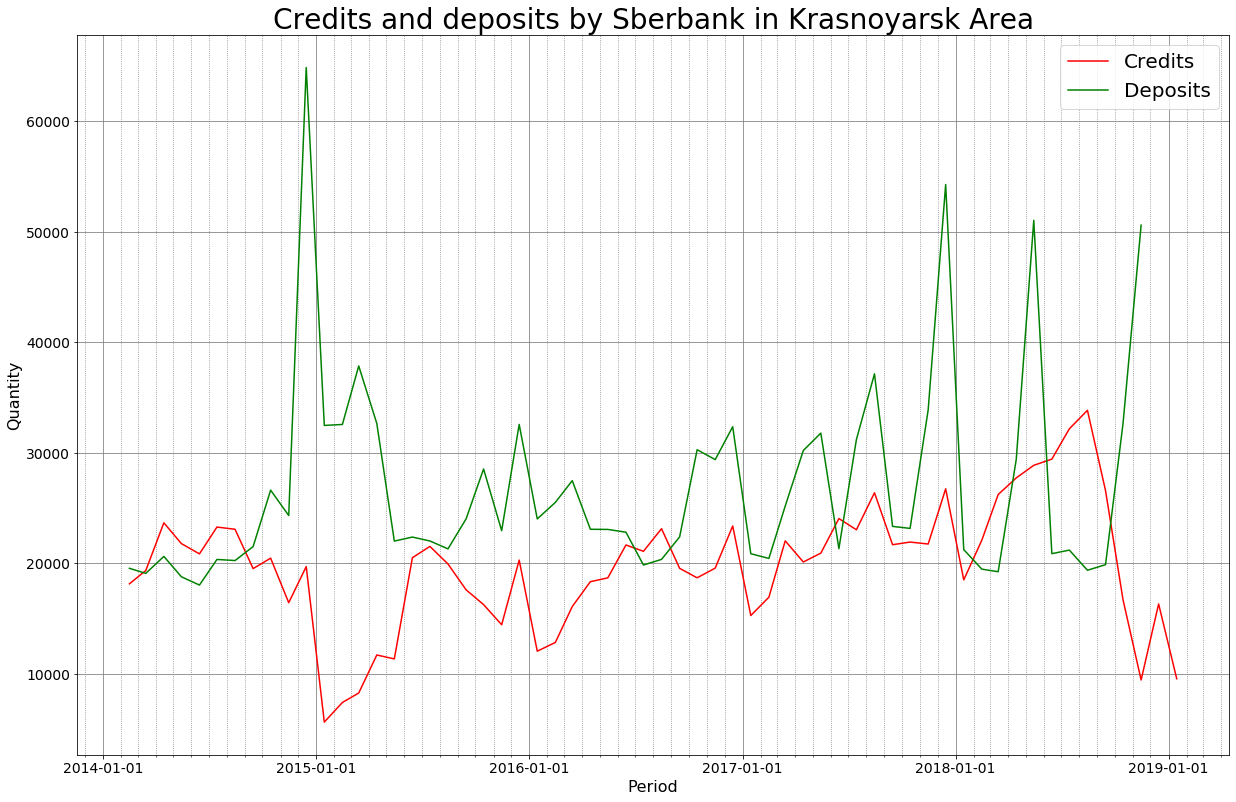

In [237]:
fig = plt.figure(figsize=(16,10))

ax = fig.add_axes([0,0,1,1])

ax.plot(credits['date'], credits['value'], color = "red" ,label="Credits")
ax.plot(deposits['date'], deposits['value'], color = "green", label="Deposits")
ax.set_title('Credits and deposits by Sberbank in Krasnoyarsk Area', fontsize = 28)

ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(months)

ax.set_xlabel('Period', fontsize = 16)
ax.set_ylabel('Quantity', fontsize = 16)

ax.grid(which='major',
        color = 'gray')

ax.grid(which='minor',
        color = 'gray',
        linestyle = ':')

plt.tick_params(labelsize=14)
       
ax.legend(prop={'size': 20})

In [239]:
credits_average_sum = df.loc[(df['name'] == 'Средняя сумма заявки на потребительский кредит') & (df['region'] == 'Красноярский край') & (df['date'] > '2014-01-15')]

In [240]:
deposits_average_sum = df.loc[(df['name'] == 'Средняя сумма нового депозита') & (df['region'] == 'Красноярский край') & (df['date'] > '2014-01-15')]

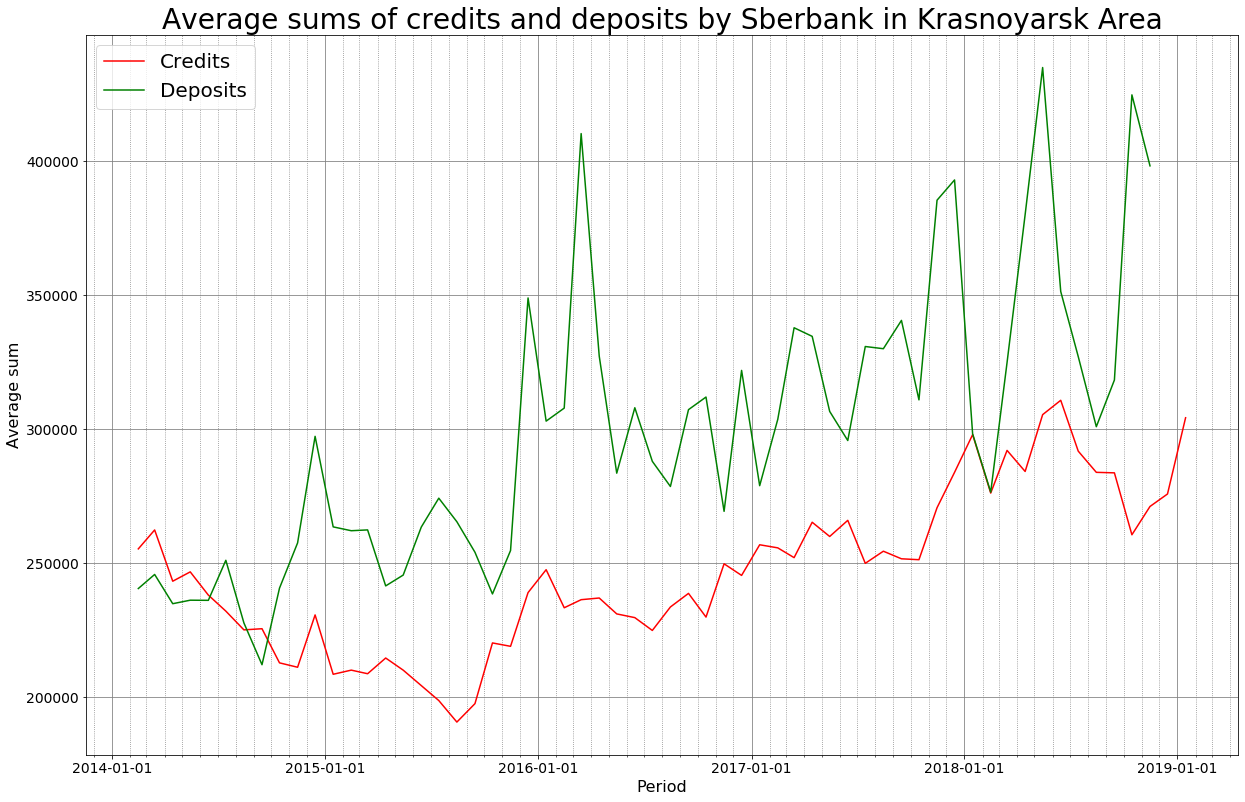

In [242]:
fig = plt.figure(figsize=(16,10))

ax = fig.add_axes([0,0,1,1])

ax.plot(credits_average_sum['date'], credits_average_sum['value'], color = "red" ,label="Credits")
ax.plot(deposits_average_sum['date'], deposits_average_sum['value'], color = "green", label="Deposits")
ax.set_title('Average sums of credits and deposits by Sberbank in Krasnoyarsk Area', fontsize = 28)

ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(months)

ax.set_xlabel('Period', fontsize = 16)
ax.set_ylabel('Average sum', fontsize = 16)

ax.grid(which='major',
        color = 'gray')

ax.grid(which='minor',
        color = 'gray',
        linestyle = ':')

plt.tick_params(labelsize=14)
       
ax.legend(prop={'size': 20})